In [4]:
#importing necessary libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#reading an excel dataset for the analysis and displaying first 10 rows
df = pd.read_excel("project_flood_dataset_sub-sahara_africa.xlsx")
df.head(10)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0079-NAM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,NAM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":22261,""adm2_name"":""Mariental Rur...",2003-07-01,2023-09-25
1,2000-0118-MWI,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,MWI,...,NaN,NaN,NaN,NaN,1000.0,1822.0,54.895152,"[{""adm2_code"":19312,""adm2_name"":""Nkhotakota""},...",2003-07-01,2023-09-25
2,2000-0152-AGO,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":4208,""adm2_name"":""Dande""}]",2003-07-01,2023-09-25
3,2000-0193-AGO,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":4251,""adm2_name"":""Porto Amboim""}]",2003-07-01,2023-09-25
4,2000-0260-AGO,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":4221,""adm2_name"":""Ganda""}]",2003-07-01,2023-09-25
5,2000-0364-NGA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,NGA,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":190962,""adm2_name"":""Sokoto North...",2003-07-01,2023-09-25
6,2000-0399-ETH,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,ETH,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":149277,""adm2_name"":""Region 14""},...",2003-07-01,2023-09-25
7,2000-0490-SOM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":25672,""adm2_name"":""Banadir""}]",2003-07-01,2023-09-25
8,2000-0501-NER,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,NER,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2204,""adm1_name"":""Dosso""},{""adm1...",2003-07-01,2023-09-25
9,2000-0511-NGA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,NGA,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2217,""adm1_name"":""Cross River""}]",2003-07-01,2023-09-25


In [6]:
#Checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 206, dtype: bool

In [7]:
#checking for null values
df.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 136
Event Name                                   204
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                       1
Origin                                        76
Associated Types                             172
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  205
Magnitude           

In [8]:
#dropping completely all empty columns
df=df.drop(columns=["Classification Key", "Disaster Subtype", "External IDs", "Event Name", "AID Contribution ('000 US$)", "Magnitude","Magnitude Scale", "Latitude", "Longitude", "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", "CPI","Admin Units", "Entry Date", "Last Update"])

In [9]:
#to fill numerical columns with nan values with zero (0)
columns_to_fill=["Start Day", "End Day", "Total Deaths", "No. Injured", "No. Affected", "No. Homeless", "Total Affected"]
for column_name in columns_to_fill:
    df.loc[df[column_name].isna(),column_name]=0

In [10]:
df.isnull().sum()

DisNo.                 0
Historic               0
Disaster Group         0
Disaster Subgroup      0
Disaster Type          0
ISO                    0
Country                0
Subregion              0
Region                 0
Location               1
Origin                76
Associated Types     172
OFDA/BHA Response      0
Appeal                 0
Declaration            0
River Basin          174
Start Year             0
Start Month            0
Start Day              0
End Year               0
End Month              0
End Day                0
Total Deaths           0
No. Injured            0
No. Affected           0
No. Homeless           0
Total Affected         0
dtype: int64

In [11]:
#to fill other columns with nan values with zero (nonspecified)
columns_to_fill=["Origin", "Location", "River Basin"]
for column_name in columns_to_fill:
    df.loc[df[column_name].isna(),column_name]="nonspecified"

In [12]:
df.isnull().sum()

DisNo.                 0
Historic               0
Disaster Group         0
Disaster Subgroup      0
Disaster Type          0
ISO                    0
Country                0
Subregion              0
Region                 0
Location               0
Origin                 0
Associated Types     172
OFDA/BHA Response      0
Appeal                 0
Declaration            0
River Basin            0
Start Year             0
Start Month            0
Start Day              0
End Year               0
End Month              0
End Day                0
Total Deaths           0
No. Injured            0
No. Affected           0
No. Homeless           0
Total Affected         0
dtype: int64

In [14]:
# changing data types
dtype={ "Total Deaths" : "int64",
"No. Injured": "int64",
"No. Affected": "int64",
 "No. Homeless": "int64",
 "Total Affected": "int64",
 "Start Month": "category",
 "End Month": "category",
 "Start Year": "category",
 "End Year": "category"}

In [15]:
df=df.astype(dtype)

In [16]:
df.head()

,DisNo.,Historic,Disaster Group,Disaster Subgroup,Disaster Type,ISO,Country,Subregion,Region,Location,...,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,2000-0079-NAM,No,Natural,Hydrological,Flood,NAM,Namibia,Sub-Saharan Africa,Africa,"Mariental Rural, Mariental Urban districts (Ha...",...,2,0.0,2000,2,0.0,0,0,5000,0,5000
1,2000-0118-MWI,No,Natural,Hydrological,Flood,MWI,Malawi,Sub-Saharan Africa,Africa,"Chikwawa, Nsanje districts (Southern Region pr...",...,3,0.0,2000,3,0.0,0,0,20000,0,20000
2,2000-0152-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,"Caxito village (Dande district, Bengo province)",...,3,27.0,2000,3,27.0,3,0,0,6000,6000
3,2000-0193-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,Porto Amboim district (Cuanza Sul province),...,4,10.0,2000,4,10.0,1,0,0,3000,3000
4,2000-0260-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,Ganda district (Benguela province),...,5,3.0,2000,5,3.0,11,11,0,0,11


In [17]:
df=pd.read_csv("flood in Africa region.csv")
df.head()

,DisNo.,Historic,Disaster Group,Disaster Subgroup,Disaster Type,ISO,Country,Subregion,Region,Location,...,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,2000-0079-NAM,No,Natural,Hydrological,Flood,NAM,Namibia,Sub-Saharan Africa,Africa,"Mariental Rural, Mariental Urban districts (Ha...",...,2,0.0,2000,2,0.0,0,0,5000,0,5000
1,2000-0118-MWI,No,Natural,Hydrological,Flood,MWI,Malawi,Sub-Saharan Africa,Africa,"Chikwawa, Nsanje districts (Southern Region pr...",...,3,0.0,2000,3,0.0,0,0,20000,0,20000
2,2000-0152-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,"Caxito village (Dande district, Bengo province)",...,3,27.0,2000,3,27.0,3,0,0,6000,6000
3,2000-0193-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,Porto Amboim district (Cuanza Sul province),...,4,10.0,2000,4,10.0,1,0,0,3000,3000
4,2000-0260-AGO,No,Natural,Hydrological,Flood,AGO,Angola,Sub-Saharan Africa,Africa,Ganda district (Benguela province),...,5,3.0,2000,5,3.0,11,11,0,0,11


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DisNo.             206 non-null    object 
 1   Historic           206 non-null    object 
 2   Disaster Group     206 non-null    object 
 3   Disaster Subgroup  206 non-null    object 
 4   Disaster Type      206 non-null    object 
 5   ISO                206 non-null    object 
 6   Country            206 non-null    object 
 7   Subregion          206 non-null    object 
 8   Region             206 non-null    object 
 9   Location           205 non-null    object 
 10  Origin             130 non-null    object 
 11  Associated Types   34 non-null     object 
 12  OFDA/BHA Response  206 non-null    object 
 13  Appeal             206 non-null    object 
 14  Declaration        206 non-null    object 
 15  River Basin        32 non-null     object 
 16  Start Year         206 non

In [19]:
#which country has the highest no of  recorded flood event
freq_flood=df.value_counts(["Country"])
print(freq_flood)

Country                         
Nigeria                             18
Burundi                             11
Democratic Republic of the Congo    10
United Republic of Tanzania         10
Mozambique                          10
Malawi                               9
Rwanda                               9
Uganda                               9
Niger                                8
Angola                               7
Ghana                                7
South Africa                         7
Mali                                 6
Kenya                                6
Ethiopia                             6
Zambia                               5
Sudan                                5
Côte d’Ivoire                        4
Burkina Faso                         4
Algeria                              4
Somalia                              4
Mauritania                           4
Namibia                              3
Congo                                3
Cameroon                       

In [6]:
#to check the total no of affected persons by country
#list of total affected  contries arranged in descending order
group_country=df.groupby(by="Country")
top_affect=group_country["Total Affected"].sum().reset_index()
df_sorted=top_affect.sort_values("Total Affected",ascending=False)
df_sorted

,Country,Total Affected
30,Nigeria,2225769
34,Somalia,2136316
36,South Sudan,1764000
15,Ethiopia,1448954
29,Niger,1370026
23,Malawi,1334070
41,Zambia,1323672
17,Ghana,1131302
19,Kenya,1041843
37,Sudan,1038627


Text(0.5, 0, 'Year')

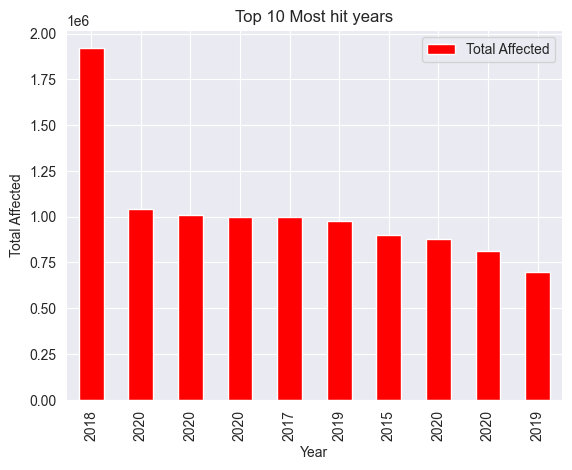

In [20]:
#top ten most affected year
df.nlargest(10,"Total Affected").plot(kind="bar",x="End Year",y="Total Affected",color="red")
plt.title("Top 10 Most hit years")
plt.ylabel("Total Affected")
plt.xlabel("Year")

In [21]:
#to check the total no of of homeless by country
#list of total affected  contries arranged in descending order
group_country=df.groupby(by="Country")
top_affect=group_country["No. Homeless"].sum().reset_index()
df_sorted=top_affect.sort_values("No. Homeless",ascending=False)
df_sorted

,Country,No. Homeless
29,Niger,632608
34,Somalia,220000
27,Mozambique,77150
40,United Republic of Tanzania,36875
3,Burkina Faso,23500
39,Uganda,20400
12,Democratic Republic of the Congo,16243
37,Sudan,11300
6,Cameroon,10279
1,Angola,9280


In [22]:
px.bar(data_frame=df_sorted,x="No. Homeless",y="Country")

In [23]:
#to check the total no of of homeless by country
#list of total affected  contries arranged in descending order
group_country=df.groupby(by="Country")
top_affect=group_country["Total Deaths"].sum().reset_index()
df_sorted=top_affect.sort_values("Total Deaths",ascending=False)
df_sorted

,Country,Total Deaths
30,Nigeria,560
19,Kenya,460
29,Niger,279
12,Democratic Republic of the Congo,275
37,Sudan,178
27,Mozambique,174
31,Rwanda,168
40,United Republic of Tanzania,154
35,South Africa,108
17,Ghana,95


Text(0.5, 0, 'Year')

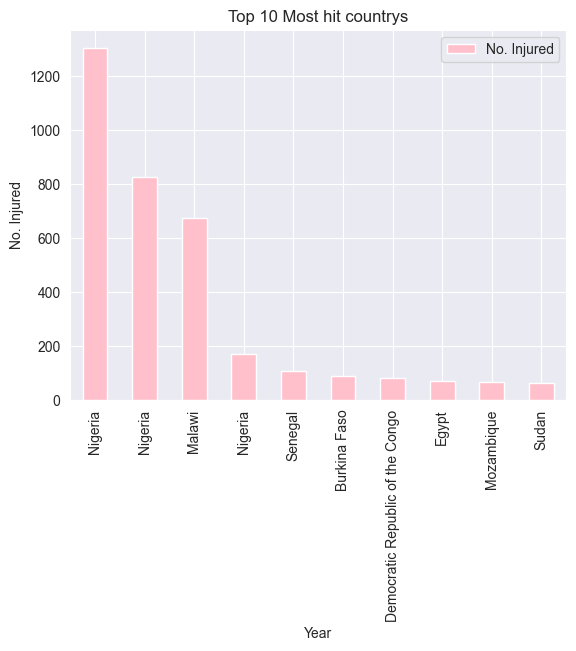

In [24]:
#top ten most injured
df.nlargest(10,"No. Injured").plot(kind="bar",x="Country",y="No. Injured",color="pink")
plt.title("Top 10 Most hit countrys")
plt.ylabel("No. Injured")
plt.xlabel("Year")

In [25]:
#to check the total no of of homeless by country
#list of total affected  contries arranged in descending order
group_country=df.groupby(by="Country")
top_affect=group_country["No. Injured"].sum().reset_index()
df_sorted=top_affect.sort_values("No. Injured",ascending=False)
df_sorted

,Country,No. Injured
30,Nigeria,2302
23,Malawi,672
32,Senegal,155
3,Burkina Faso,111
12,Democratic Republic of the Congo,101
37,Sudan,74
14,Egypt,70
31,Rwanda,68
27,Mozambique,66
11,Côte d’Ivoire,64
